## Importing packages

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset

In [2]:
df = pd.read_csv('fakedata_EDA_copy.csv')
df.head()

,Date,Customer Acquisition Type,Country,Product,Units,Price,Revenue,Delivery Performance,Return,Customer Satisfaction
0,1/1/2020,Returning,United Kingdoms,Product 1,2,300,600,On-time,No,Good
1,1/1/2020,Returning,France,Product 4,43,400,17200,On-time,No,Good
2,1/1/2020,Ad,Poland,Product 5,23,200,4600,On-time,No,Good
3,1/1/2020,Organic,Germany,Product 2,48,500,24000,On-time,Yes,Good
4,1/1/2020,Organic,United Kingdoms,Product 4,44,400,17600,Delayed,No,Very good


In [3]:
df.describe()

,Units,Price,Revenue
count,8000.000000,8000.000000,8000.000000
mean,25.201375,358.887500,9061.012500
std,14.166083,129.143707,6304.650847
min,1.000000,100.000000,100.000000
25%,13.000000,300.000000,3600.000000
50%,25.000000,400.000000,8000.000000
75%,37.000000,500.000000,13500.000000
max,49.000000,500.000000,24500.000000


In [4]:
df.describe(include='all')

,Date,Customer Acquisition Type,Country,Product,Units,Price,Revenue,Delivery Performance,Return,Customer Satisfaction
count,8000,8000,8000,8000,8000.000000,8000.000000,8000.000000,8000,8000,8000
unique,730,3,6,5,NaN,NaN,NaN,2,2,5
top,10/25/2020,Organic,Poland,Product 2,NaN,NaN,NaN,On-time,No,Good
freq,24,3224,2399,2408,NaN,NaN,NaN,6761,7172,3177
mean,NaN,NaN,NaN,NaN,25.201375,358.887500,9061.012500,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,14.166083,129.143707,6304.650847,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,100.000000,100.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,13.000000,300.000000,3600.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,25.000000,400.000000,8000.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,37.000000,500.000000,13500.000000,NaN,NaN,NaN


### Highest sells

In [7]:
highest = df[df.Revenue == df.Revenue.max()]
highest.head()

,Date,Customer Acquisition Type,Country,Product,Units,Price,Revenue,Delivery Performance,Return,Customer Satisfaction
173,1/16/2020,Organic,Germany,Product 2,49,500,24500,On-time,Yes,Good
193,1/18/2020,Returning,United Kingdoms,Product 2,49,500,24500,On-time,No,Good
437,2/7/2020,Organic,Poland,Product 2,49,500,24500,On-time,No,Good
467,2/11/2020,Ad,Poland,Product 2,49,500,24500,On-time,No,Good
587,2/23/2020,Returning,Poland,Product 2,49,500,24500,On-time,No,Ok


In [8]:
highest.groupby(by=["Country"])["Date"].count()

Country
France              4
Germany            15
Norway              1
Poland             16
Spain               6
United Kingdoms    12
Name: Date, dtype: int64

In [9]:
highest.groupby(by=["Country"]).sum()

,Units,Price,Revenue
Country,,,
France,196,2000,98000
Germany,735,7500,367500
Norway,49,500,24500
Poland,784,8000,392000
Spain,294,3000,147000
United Kingdoms,588,6000,294000


### Lowest Sells

In [10]:
lowest = df[df.Revenue == df.Revenue.min()]
lowest.head()

,Date,Customer Acquisition Type,Country,Product,Units,Price,Revenue,Delivery Performance,Return,Customer Satisfaction
80,1/7/2020,Returning,Spain,Product 3,1,100,100,On-time,No,Good
156,1/14/2020,Organic,Poland,Product 3,1,100,100,On-time,No,Very good
1606,5/25/2020,Organic,Poland,Product 3,1,100,100,On-time,No,Good
2231,7/22/2020,Ad,Norway,Product 3,1,100,100,On-time,No,Very good
2510,8/16/2020,Returning,Spain,Product 3,1,100,100,On-time,No,Good


### Customer Satisfaction = Very low

In [12]:
low_satisf = df[df["Customer Satisfaction"] == "Very low"]

In [13]:
low_satisf.head()

,Date,Customer Acquisition Type,Country,Product,Units,Price,Revenue,Delivery Performance,Return,Customer Satisfaction
11,1/1/2020,Organic,Germany,Product 1,13,300,3900,Delayed,No,Very low
14,1/2/2020,Organic,Germany,Product 3,48,100,4800,On-time,No,Very low
29,1/3/2020,Organic,Poland,Product 4,33,400,13200,On-time,No,Very low
88,1/8/2020,Returning,Germany,Product 4,27,400,10800,Delayed,No,Very low
94,1/9/2020,Returning,Norway,Product 2,31,500,15500,On-time,No,Very low


In [14]:
low_satisf.groupby(by=["Country"])["Date"].count()

Country
France             48
Germany            81
Norway             13
Poland             95
Spain              34
United Kingdoms    65
Name: Date, dtype: int64

In [15]:
df.groupby(by=["Country"]).Revenue.describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
France,1189.0,8880.403701,6345.536715,100.0,3200.0,8000.0,13500.0,24500.0
Germany,1598.0,9029.974969,6385.127434,100.0,3600.0,8000.0,13500.0,24500.0
Norway,401.0,8359.600998,6073.488605,100.0,3300.0,7500.0,12400.0,24500.0
Poland,2399.0,9280.366820,6300.726929,100.0,3900.0,8400.0,14000.0,24500.0
Spain,786.0,9266.921120,6425.722587,100.0,3825.0,8400.0,13500.0,24500.0
United Kingdoms,1627.0,8973.448064,6186.873228,100.0,3600.0,8000.0,13500.0,24500.0


### Visualizations

<AxesSubplot:xlabel='Country', ylabel='Revenue'>

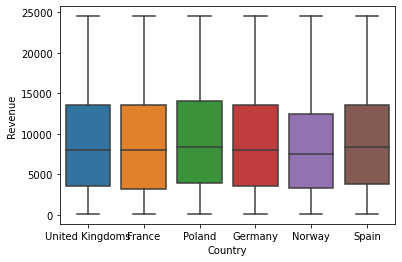

In [17]:
sns.boxplot(x = 'Country', y = 'Revenue', data = df) 

<AxesSubplot:xlabel='Country', ylabel='Revenue'>

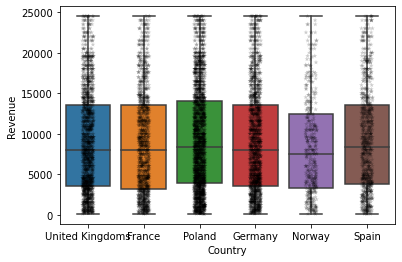

In [18]:
sns.boxplot(x = 'Country', y = 'Revenue', data = df) 
sns.stripplot(x = 'Country', y = 'Revenue', data = df,
              jitter=True, 
              marker='*',
              alpha=0.2, 
              color="black")

In [31]:
poland = df[df.Country == "Poland"]

<AxesSubplot:xlabel='Product', ylabel='Revenue'>

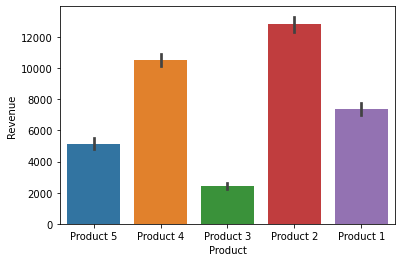

In [32]:
sns.barplot(data=poland, x="Product", y='Revenue')

<AxesSubplot:xlabel='Product', ylabel='Revenue'>

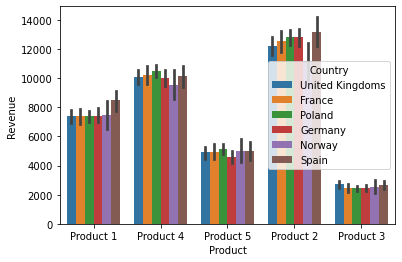

In [33]:
sns.barplot(data=df, x="Product", y="Revenue", hue="Country")

<AxesSubplot:xlabel='Revenue', ylabel='Country'>

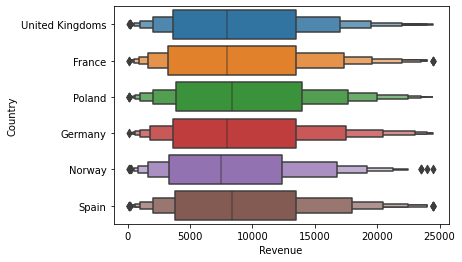

In [34]:
sns.boxenplot(data=df, x="Revenue", y="Country")

<AxesSubplot:>

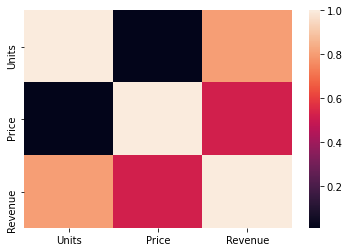

In [35]:
corr = df.corr()
sns.heatmap(corr)

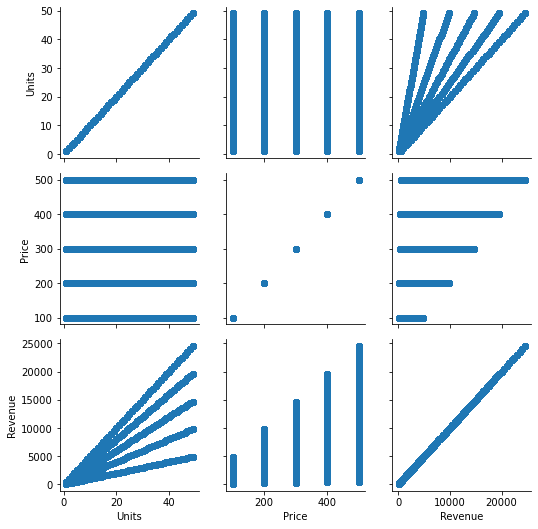

In [36]:
number = df.select_dtypes(include=['number'])
g = sns.PairGrid(number)
g.map(plt.scatter);